In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#generate data
x = np.arange(0,100,1)
y = 2 * x + np.random.normal(0,10,size = (100))

x : sample , y : true solution , hx : prediction

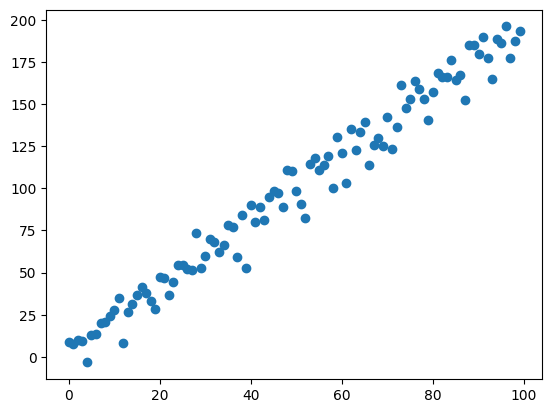

In [20]:
# show data
plt.scatter(x,y)
plt.show()

In [26]:
# define linear model with parameter w and b
def Model(x, w, b):
    x = np.array(x)
    return w * x + b

#define Loss function using MSE
def Loss(x, w, b, y):
    return np.mean((Model(x, w, b) - y)**2)

The loss function is defined in the following way: $l(w,b) = \frac{1}{N} \sum^i_{i=n}(h(x;w,b)-y)^2$. Ususally the loss function is divided by 2 to get rid of 2 in its derivative, but here we dont care that.

In [27]:
#Since we will use gradient descent, we find the derivative of loss function w.r.t w and b
def dLoss_w(x, w, b, y):
    return np.mean(2 * (Model(x, w, b) - y) * x)

def dLoss_b(x, w, b, y):
    return np.mean(2 * (Model(x, w, b) - y) * 1)

If the loss function is too complex to find its derivative, we can use the definition of df/dx which is $df/dx = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$ or $df/dx = \lim_{h \to 0} \frac{f(x+h) - f(x-h)}{2h} $

In [28]:
def train(epoches, learning_rate,x,y):
    w,b = [1,0]
    for epoch in range(epoches):

        h = Model(x,w,b)
        loss = Loss(x, w, b, y)

        w -= learning_rate * dLoss_w(x, w, b, y)
        b -= learning_rate * dLoss_b(x, w, b, y)

        if epoch % 10 == 0:
            print('epoch: %d, loss: %.2f' %(epoch,loss))

    return w,b

In [31]:
epoches = 100
learning_rate = 1e-4
w,b = train(epoches,learning_rate,x,y)

epoch: 0, loss: 3245.51
epoch: 10, loss: 86.08
epoch: 20, loss: 86.08
epoch: 30, loss: 86.07
epoch: 40, loss: 86.07
epoch: 50, loss: 86.07
epoch: 60, loss: 86.06
epoch: 70, loss: 86.06
epoch: 80, loss: 86.06
epoch: 90, loss: 86.05


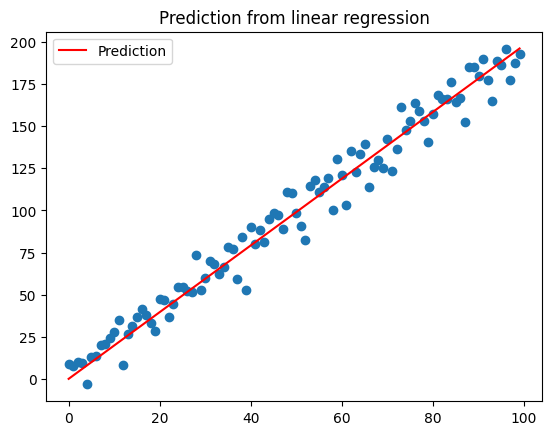

In [32]:
#plot the result
h = Model(x,w,b)
plt.plot(x,h,label = 'Prediction',color = 'red')
plt.scatter(x,y)
plt.title('Prediction from linear regression')
plt.legend()
plt.show()

The model will be more stable if we normalize the data

In [ ]:
#Lasso regression and Ridge regression
def Loss_Ridge(x, w, b, y, lam):
    return Loss(x, w, b, y) + lam*np.sum(w**2)

def dLoss_w_Ridge(x, w, b, y, lam):
    return dLoss_w(x, w, b, y) + np.sum(2 * lam * w)

def dLoss_b_Ridge(x, w, b, y):
    return np.mean(2 * (Model(x, w, b) - y) * 1)

In [ ]:
def Loss_Lasso(x, w, b, y, alpha):
    pass